In [1]:
!pip install emoji

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 586.9/586.9 kB 16.0 MB/s eta 0:00:00


In [2]:
!pip install pymorphy3

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 53.8/53.8 kB 3.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8.4/8.4 MB 41.1 MB/s eta 0:00:00


# Load Libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import nltk
import re
import os
import emoji
import time
from string import punctuation

from pymorphy3 import MorphAnalyzer
from IPython.core.display import display, HTML
from nltk.corpus import stopwords
from collections import defaultdict
from wordcloud import WordCloud
from collections import Counter
from tqdm import tqdm


from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")
tqdm.pandas()

RANDOM_SEED = 42

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
data_path = '/content/gdrive/MyDrive/Colab_Notebooks/Stocks_project/data'

# Load Data

In [33]:
data = pd.read_csv(os.path.join(data_path,'news_high_rep_tickers_two_channels.csv'))
data.head()

message_id       channel_db_table       date_published  \
0           6  messages_newssmartlab  2021-03-29 15:31:02   
1          13  messages_grigorievspy  2024-01-05 18:15:36   
2          14  messages_newssmartlab  2021-03-29 17:05:22   
3          15  messages_grigorievspy  2024-01-05 18:45:13   
4          20  messages_grigorievspy  2024-01-05 19:25:56   

                                                text  AFKS  AFLT  ASTR  CHMF  \
0  –ú–µ–Ω–µ–¥–∂–º–µ–Ω—Ç –õ–°–† –±—É–¥–µ—Ç –ø–æ—Å—Ç–µ–ø–µ–Ω–Ω–æ –ø–æ–≤—ã—à–∞—Ç—å –¥–∏–≤–∏–¥...     0     0     0     0   
1  ‚¨ÜÔ∏è #GAZP 57.63M‚ÇΩ +0.22%\n–ì–∞–∑–ø—Ä–æ–º\n–û–±—ä—ë–º: 57.63...     0     0     0     0   
2     –õ–°–† –≤—ã—Ö–æ–¥–∏—Ç –Ω–∞ —Ä—ã–Ω–æ–∫ –∫–æ—Ç—Ç–µ–¥–∂–Ω–æ–≥–æ —Å—Ç—Ä–æ–∏—Ç–µ–ª—å—Å—Ç–≤–∞     0     0     0     0   
3  ‚¨áÔ∏è #SBER 133.22M‚ÇΩ 0.0%\n–°–±–µ—Ä –ë–∞–Ω–∫\n–û–±—ä—ë–º: 133....     0     0     0     0   
4  ‚¨áÔ∏è #ROSN 26.58M‚ÇΩ -0.01%\n–†–æ—Å–Ω–µ—Ñ—Ç—å\n–û–±—ä—ë–º: 26.5...     0     0     0     0   

   FESH  GAZP  ...  POSI  RNFT  ROSN  RTKM  RUAL  SBER  SFIN  SNGS  VTBR  YNDX  
0     0     0  ...     0     0     0     0     0     0     0     0     0     0  
1     0     1  ...     0     0     0     0     0     0     0     0     0     0  
2     0     0  ...     0     0     0     0     0     0     0     0     0     0  
3     0     0  ...     0     0     0     0     0     1     0     0     0     0  
4     0     0  ...     0     0     1     0     0     0     0     0     0     0  

[5 rows x 28 columns]

In [34]:
tickers = [col for col in data.columns if col != "message_id" and col != "channel_db_table" and col != "date_published" and col != "text"]
f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–∏–∫–µ—Ä–æ–≤: {len(tickers)}'

'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–∏–∫–µ—Ä–æ–≤: 24'

In [35]:
absolute_counts = data[tickers].sum()
total_news = len(data)
percentage_counts = (absolute_counts / total_news) * 100
result = pd.DataFrame({
    'Ticker': tickers,
    'Absolute Count': absolute_counts.values,
    'Percentage': percentage_counts.values
})

result = result.sort_values(by='Absolute Count', ascending=False)
pd.set_option('display.max_rows', None)
result

Ticker  Absolute Count  Percentage
4    FESH            3502    8.834956
5    GAZP            3258    8.219385
15   RNFT            3217    8.115949
7    LSRG            2751    6.940310
0    AFKS            2269    5.724305
1    AFLT            1789    4.513346
16   ROSN            1782    4.495686
23   YNDX            1604    4.046622
20   SFIN            1552    3.915435
19   SBER            1546    3.900298
22   VTBR            1471    3.711085
11   NVTK            1407    3.549624
18   RUAL            1370    3.456279
10   MVID            1305    3.292295
9    MOEX            1283    3.236793
3    CHMF            1281    3.231747
6    LKOH            1261    3.181291
14   POSI            1258    3.173722
12   PIKK            1240    3.128311
17   RTKM            1227    3.095514
2    ASTR            1184    2.987033
21   SNGS            1166    2.941622
8    MAGN            1164    2.936576
13   PLZL            1092    2.754932

In [36]:
pd.reset_option('display.max_rows')

In [37]:
info = pd.Series({'Number of news': data.shape[0],
                        'Number of tickers': len(tickers),
                        'Number of telegram channels': data.channel_db_table.nunique(),
                        'The earliest datetime value': data.date_published.min(),
                        'The latest datetime value': data.date_published.max()
                      })

# Convert the series to a DataFrame
info = pd.DataFrame(info, columns=['values'])
info

values
Number of news                             39638
Number of tickers                             24
Number of telegram channels                    2
The earliest datetime value  2021-03-29 15:31:02
The latest datetime value    2024-06-12 10:23:30

In [38]:
class_sums = data[tickers].sum()

fig = px.bar(
    x=class_sums.index,
    y=class_sums.values,
    title=f"News Distribution by Tickers",
    labels={"x": "Ticker", "y": "Number of News"},
    template="plotly_white"
)


fig.update_xaxes(
    title="Tickers",
    tickangle=45,
    tickfont=dict(size=10),
    automargin=True
)


fig.update_yaxes(
    title="Number of News",
    tickformat=","
)


fig.update_layout(
    width=1200,
    height=500,
    bargap=0.1,
)

fig.show()

The distribution is noticeably imbalanced. The top ticker, FESH, contributes 8.83%, while the lowest, PLZL, contributes only 2.75%

# Split Data

We set 80% of the total data as the training dataset, reserving the remaining 20% for testing, and then further split the training dataset into training and validation subsets.

In [12]:
# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
train, test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)
train, valid = train_test_split(train, test_size=0.2, random_state=RANDOM_SEED)

In [13]:
data = {
    'train': [f'{train.shape[0]} ({len(train) / len(data) * 100:.0f}%)'],
    'valid': [f'{valid.shape[0]} ({len(valid) / len(data) * 100:.0f}%)'],
    'test': [f'{test.shape[0]} ({len(test) / len(data) * 100:.0f}%)']
}

df_percentages = pd.DataFrame(data)
df_percentages

train       valid        test
0  25368 (64%)  6342 (16%)  7928 (20%)

In [14]:
train.to_csv(os.path.join(data_path,'train_data.csv'), index=False)
test.to_csv(os.path.join(data_path,'test_data.csv'), index=False)
valid.to_csv(os.path.join(data_path,'valid_data.csv'), index=False)

# Classes Distribution in Train/Test/Valid

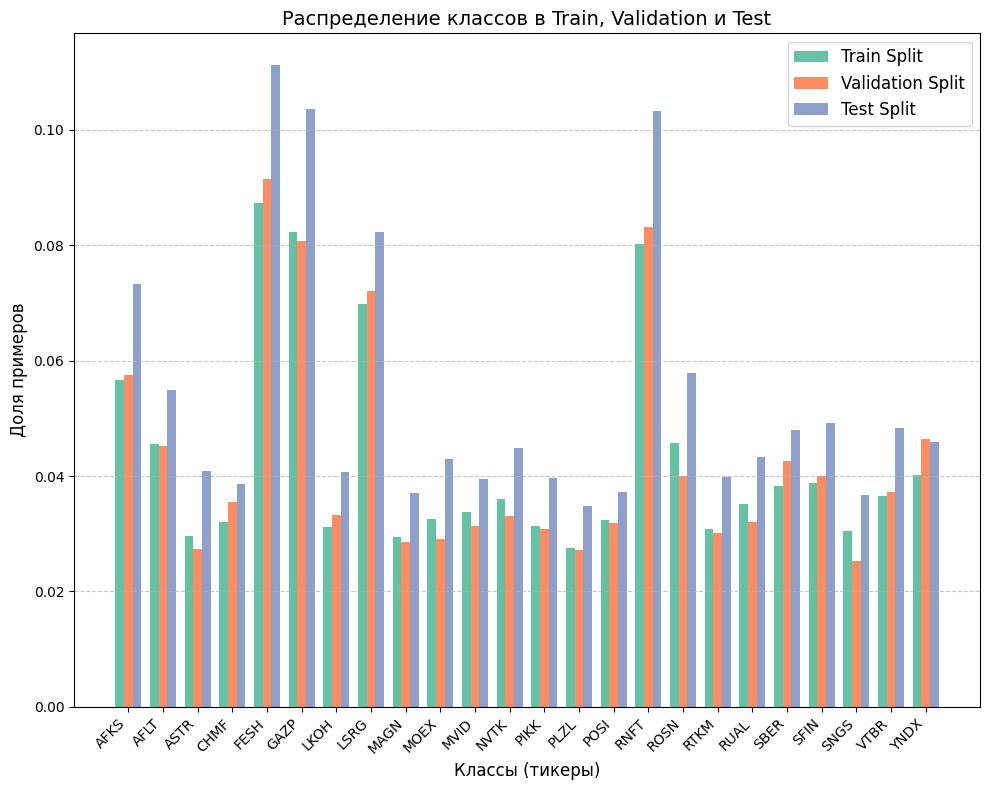

In [15]:
train_distribution = train[tickers].sum()
val_distribution = valid[tickers].sum()
test_distribution = test[tickers].sum()

# –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è, —á—Ç–æ–±—ã –ø–æ–∫–∞–∑–∞—Ç—å –¥–æ–ª–∏
train_distribution_normalized = train_distribution / len(train)
val_distribution_normalized = val_distribution / len(valid)
test_distribution_normalized = test_distribution / len(valid)

# –£—Å—Ç–∞–Ω–æ–≤–∫–∞ —Ü–≤–µ—Ç–æ–≤ –¥–ª—è —Å–ø–ª–∏—Ç–æ–≤
colors = sns.color_palette("Set2", 3)

fig, ax = plt.subplots(figsize=(10, 8))

# –®–∏—Ä–∏–Ω–∞ —Å—Ç–æ–ª–±—Ü–æ–≤ –∏ –∏—Ö –ø–æ–∑–∏—Ü–∏–∏
bar_width = 0.25
positions = np.arange(len(tickers))

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º –¥–ª—è Train, Validation –∏ Test
ax.bar(positions - bar_width, train_distribution_normalized, width=bar_width, color=colors[0], label='Train Split')
ax.bar(positions, val_distribution_normalized, width=bar_width, color=colors[1], label='Validation Split')
ax.bar(positions + bar_width, test_distribution_normalized, width=bar_width, color=colors[2], label='Test Split')

# –£—Å—Ç–∞–Ω–æ–≤–∫–∞ –º–µ—Ç–æ–∫ –∏ —Ç–µ–∫—Å—Ç–∞
ax.set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤ –≤ Train, Validation –∏ Test', fontsize=14)
ax.set_xlabel('–ö–ª–∞—Å—Å—ã (—Ç–∏–∫–µ—Ä—ã)', fontsize=12)
ax.set_ylabel('–î–æ–ª—è –ø—Ä–∏–º–µ—Ä–æ–≤', fontsize=12)
ax.set_xticks(positions)
ax.set_xticklabels(tickers, rotation=45, ha='right')
ax.legend(fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


# Text Preprocess

In [16]:
from nltk.corpus import stopwords
nltk.download("stopwords")

mystopwords = stopwords.words('russian')
sorted(mystopwords)[:5]

mystopwords.extend(
    [
        '—ç—Ç–æ',
        '—Ç–∞–∫',
        '–∏–∑',
        '–∏–∑-–∑–∞',
        '–Ω–∞',
        '–æ–∫',
        '–∫—Å—Ç–∞—Ç–∏',
        '–∫–æ—Ç–æ—Ä—ã–π',
        '–º–æ—á—å',
        '–≤–µ—Å—å',
        '–µ—â–µ',
        '—Ç–∞–∫–∂–µ',
        '—Å–∞–º—ã–π',
        '—Å—Ä–µ–¥–∏',
        '–∫—Ä–æ–º–µ',
        '—Ä–∞–Ω–µ–µ',
        '–ø–æ–∫–∞',
        '—Å–≤–æ–π',
        '–Ω–∞—à',
        '–Ω–∞–ø—Ä–∏–º–µ—Ä',
        '–ø–æ—ç—Ç–æ–º—É',
        '–æ—á–µ–Ω—å',
        '–æ–¥–Ω–∞–∫–æ',
        '–∑–∞—Ç–µ–º',
        '–∏–º–µ–Ω–Ω–æ',
        '–ø–æ—Å–∫–æ–ª—å–∫—É'
    ]
)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
RUBBISH_PATTERN = r'–ß–∏—Ç–∞—Ç—å.+|–ü–æ–¥–∫–ª—é—á–∏—Ç—å –±–æ—Ç–∞-—à–ø–∏–æ–Ω–∞:?'
PATTERN_TAG = r'#\S+|\$[A-Z]{4}' #–¥–ª—è —Ç—ç–≥–æ–≤ —Ç–∏–∫–µ—Ä–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–≥—É—Ç –≤–≤–æ–¥–∏—Ç—Å—è —á–µ—Ä–µ–∑ $
LINKS_PATTERN  = r"https?://\S+"

def remove_rubbish(text):
    return re.sub(RUBBISH_PATTERN, '', text)

def remove_links(text):
    return re.sub(LINKS_PATTERN, '', text)

def remove_emojis(text):
    return emoji.replace_emoji(text, " ")

def remove_tags(text):
    return re.sub(PATTERN_TAG, '', text)

def replace_numbers(text):
    return re.sub(r'\d+', '1', text)

def remove_punctuation(text):
    text = text.translate(str.maketrans('', '', punctuation.replace('-', '') + '‚Äù‚Äû‚Äú¬´¬ª‚Ä†*\‚Äî/\\‚Äò‚Äô'))
    text = re.sub(r'-(?=\s)', '', text) #we keep hyphens inside words, standalone ones are deleted
    return text

def clean_text(text):
    if not isinstance(text, str):
        return text
    else:
        text = re.sub(r'—ë', '–µ', text)
        text = remove_emojis(text)
        text = re.sub(r'\*+', '', text)
        text = remove_rubbish(text)
        text = remove_links(text)
        text = remove_tags(text)
        text = replace_numbers(text)
        text = re.sub(r'\n|\xa0', ' ', text)  # Replace newlines and non-breaking spaces
        text = re.sub(r'\s{2,}', ' ', text)  # Remove extra spaces
        text = remove_punctuation(text)
        text = text.strip()
        text = re.sub(r'^[+\-*/=<>!?\s]+$', '', text) # $YNDX + $MTSS = ? \nü§´
        return text

def tokenize(text, regex=re.compile("[–∞-—èa-z—ë\d-]+", re.IGNORECASE)):
    try:
        tokens = regex.findall(text)
        # Tokens like "3D" or "G7" are not affected, while pure numeric tokens are removed
        tokens =  [(re.sub(r'^\d+$', '', token)) for token in tokens]
        tokens = [token for token in tokens if token.strip()]
        return tokens
    except:
        return []

def pymorphy_lemmatizer(tokens, pymorphy=MorphAnalyzer()):
    return [pymorphy.parse(token)[0].normal_form for token in tokens]

def remove_stopwords(lemmas, stopwords):
    return [w for w in lemmas if not w in stopwords]

def lemmatize(text, delete_stopwords=True, stopwords=None):
    tokens = tokenize(text)
    lemmas = pymorphy_lemmatizer(tokens)
    lemmas = [re.sub('—ë', '–µ', lemma) for lemma in lemmas]

    if delete_stopwords and stopwords is not None:
        lemmas = remove_stopwords(lemmas, stopwords=stopwords)

    return ' '.join(lemmas)


def preprocess_text(df, stopwords=None, delete_stopwords=True, make_lemmatization=True):
    df['text_cleaned'] = df.text.progress_apply(clean_text)
    if make_lemmatization==True:
        df['lemmas'] = df['text_cleaned'].progress_apply(
            lambda x: lemmatize(x, stopwords=stopwords, delete_stopwords=delete_stopwords)
        )
    else:
       df['tokens'] = df['text_cleaned'].progress_apply(tokenize)
    return df

In [18]:
preprocessed_train = preprocess_text(train, stopwords=mystopwords, delete_stopwords=True, make_lemmatization=False)
preprocessed_test = preprocess_text(test, stopwords=mystopwords, delete_stopwords=True, make_lemmatization=False)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7928/7928 [00:01<00:00, 7539.16it/s]


In [19]:
preprocessed_valid = preprocess_text(valid, stopwords=mystopwords, delete_stopwords=True, make_lemmatization=False)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6342/6342 [00:00<00:00, 18144.08it/s]


In [20]:
preprocessed_train[['text', 'text_cleaned', 'tokens']]

text  \
33503  ‚¨áÔ∏è #SNGS 55.72M‚ÇΩ -0.65%\n–°—É—Ä–≥—É—Ç–Ω–µ—Ñ—Ç–µ–≥–∞–∑\n–û–±—ä—ë–º...   
17216  ‚¨áÔ∏è #FESH 34.62M‚ÇΩ -0.33%\n–î–í–ú–ü\n–û–±—ä—ë–º: 34.62M‚ÇΩ ...   
32511  ‚¨ÜÔ∏è #RUAL 40.6M‚ÇΩ +0.21%\n–†–£–°–ê–õ\n–û–±—ä—ë–º: 40.6M‚ÇΩ (...   
876    ‚¨ÜÔ∏è #CHMF 26.05M‚ÇΩ +0.25%\n–°–µ–≤–µ—Ä—Å—Ç–∞–ª—å\n–û–±—ä—ë–º: 26...   
15477  ‚¨áÔ∏è #MVID 5.63M‚ÇΩ -0.2%\n–ú.–≤–∏–¥–µ–æ\n–û–±—ä—ë–º: 5.63M‚ÇΩ ...   
...                                                  ...   
32007  ‚¨ÜÔ∏è #RNFT 66.39M‚ÇΩ +0.14%\n–†—É—Å—Å–ù–µ—Ñ—Ç—å\n–û–±—ä—ë–º: 66....   
36606  –° 10 –Ω–æ—è–±—Ä—è –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –±–∏—Ä–∂–∞ —Ä–∞—Å—à–∏—Ä—è–µ—Ç –ø–µ—Ä–µ—á–µ–Ω...   
11960  –ú–ù–ï–ù–ò–ï: –ü–µ—Ä–µ–≤–æ–¥ —Ä–∞—Å—á–µ—Ç–æ–≤ –∑–∞ –≥–∞–∑ –≤ —Ä—É–±–ª–∏ –º–æ–∂–µ—Ç ...   
6153   –ú–ù–ï–ù–ò–ï: –ê–∫—Ü–∏–∏ –°–µ–≤–µ—Ä—Å—Ç–∞–ª–∏ —Å–º–æ–≥—É—Ç –∑–∞–∫—Ä—ã—Ç—å –¥–∏–≤–∏–¥–µ...   
24407  ‚¨áÔ∏è #PLZL 42.69M‚ÇΩ +0.39%\n–ü–æ–ª—é—Å\n–û–±—ä—ë–º: 42.69M‚ÇΩ...   

                                            text_cleaned  \
33503  11M‚ÇΩ -11 –°—É—Ä–≥—É—Ç–Ω–µ—Ñ—Ç–µ–≥–∞–∑ –û–±—ä–µ–º 11M‚ÇΩ 1 –ª–æ—Ç–æ–≤ –ü–æ–∫...   
17216  11M‚ÇΩ -11 –î–í–ú–ü –û–±—ä–µ–º 11M‚ÇΩ 1 –ª–æ—Ç–æ–≤ –ü–æ–∫—É–ø–∫–∞ 1 –ü—Ä–æ...   
32511  11M‚ÇΩ 11 –†–£–°–ê–õ –û–±—ä–µ–º 11M‚ÇΩ 1 –ª–æ—Ç–æ–≤ –ü–æ–∫—É–ø–∫–∞ 1 –ü—Ä–æ...   
876    11M‚ÇΩ 11 –°–µ–≤–µ—Ä—Å—Ç–∞–ª—å –û–±—ä–µ–º 11M‚ÇΩ 1 –ª–æ—Ç–æ–≤ –ü–æ–∫—É–ø–∫–∞ ...   
15477  11M‚ÇΩ -11 –ú–≤–∏–¥–µ–æ –û–±—ä–µ–º 11M‚ÇΩ 1 –ª–æ—Ç–æ–≤ –ü–æ–∫—É–ø–∫–∞ 1 –ü...   
...                                                  ...   
32007  11M‚ÇΩ 11 –†—É—Å—Å–ù–µ—Ñ—Ç—å –û–±—ä–µ–º 11M‚ÇΩ 1 –ª–æ—Ç–æ–≤ –ü–æ–∫—É–ø–∫–∞ 1...   
36606  –° 1 –Ω–æ—è–±—Ä—è –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –±–∏—Ä–∂–∞ —Ä–∞—Å—à–∏—Ä—è–µ—Ç –ø–µ—Ä–µ—á–µ–Ω—å...   
11960  –ú–ù–ï–ù–ò–ï –ü–µ—Ä–µ–≤–æ–¥ —Ä–∞—Å—á–µ—Ç–æ–≤ –∑–∞ –≥–∞–∑ –≤ —Ä—É–±–ª–∏ –º–æ–∂–µ—Ç –ø...   
6153   –ú–ù–ï–ù–ò–ï –ê–∫—Ü–∏–∏ –°–µ–≤–µ—Ä—Å—Ç–∞–ª–∏ —Å–º–æ–≥—É—Ç –∑–∞–∫—Ä—ã—Ç—å –¥–∏–≤–∏–¥–µ–Ω...   
24407  11M‚ÇΩ 11 –ü–æ–ª—é—Å –û–±—ä–µ–º 11M‚ÇΩ 1 –ª–æ—Ç–æ–≤ –ü–æ–∫—É–ø–∫–∞ 1 –ü—Ä–æ...   

                                                  tokens  
33503  [11M, -11, –°—É—Ä–≥—É—Ç–Ω–µ—Ñ—Ç–µ–≥–∞–∑, –û–±—ä–µ–º, 11M, –ª–æ—Ç–æ–≤, ...  
17216  [11M, -11, –î–í–ú–ü, –û–±—ä–µ–º, 11M, –ª–æ—Ç–æ–≤, –ü–æ–∫—É–ø–∫–∞, –ü...  
32511  [11M, –†–£–°–ê–õ, –û–±—ä–µ–º, 11M, –ª–æ—Ç–æ–≤, –ü–æ–∫—É–ø–∫–∞, –ü—Ä–æ–¥–∞...  
876    [11M, –°–µ–≤–µ—Ä—Å—Ç–∞–ª—å, –û–±—ä–µ–º, 11M, –ª–æ—Ç–æ–≤, –ü–æ–∫—É–ø–∫–∞, ...  
15477  [11M, -11, –ú–≤–∏–¥–µ–æ, –û–±—ä–µ–º, 11M, –ª–æ—Ç–æ–≤, –ü–æ–∫—É–ø–∫–∞,...  
...                                                  ...  
32007  [11M, –†—É—Å—Å–ù–µ—Ñ—Ç—å, –û–±—ä–µ–º, 11M, –ª–æ—Ç–æ–≤, –ü–æ–∫—É–ø–∫–∞, –ü...  
36606  [–°, –Ω–æ—è–±—Ä—è, –ú–æ—Å–∫–æ–≤—Å–∫–∞—è, –±–∏—Ä–∂–∞, —Ä–∞—Å—à–∏—Ä—è–µ—Ç, –ø–µ—Ä–µ...  
11960  [–ú–ù–ï–ù–ò–ï, –ü–µ—Ä–µ–≤–æ–¥, —Ä–∞—Å—á–µ—Ç–æ–≤, –∑–∞, –≥–∞–∑, –≤, —Ä—É–±–ª–∏,...  
6153   [–ú–ù–ï–ù–ò–ï, –ê–∫—Ü–∏–∏, –°–µ–≤–µ—Ä—Å—Ç–∞–ª–∏, —Å–º–æ–≥—É—Ç, –∑–∞–∫—Ä—ã—Ç—å, –¥...  
24407  [11M, –ü–æ–ª—é—Å, –û–±—ä–µ–º, 11M, –ª–æ—Ç–æ–≤, –ü–æ–∫—É–ø–∫–∞, –ü—Ä–æ–¥–∞...  

[25368 rows x 3 columns]

In [21]:
def remove_empty_strings(data, column):
    data = data[data[column].str.strip().ne('')]
    return data

train = remove_empty_strings(train, 'text_cleaned')
test = remove_empty_strings(test, 'text_cleaned')

In [22]:
train.shape

(25368, 30)

In [23]:
test.shape

(7928, 30)

# Text Analysis

In [24]:
train_tokens = " ".join(train.text_cleaned.tolist()).split()
test_tokens = " ".join(test.text_cleaned.tolist()).split()
valid_tokens = " ".join(valid.text_cleaned.tolist()).split()

In [25]:
train_tokens[:5]

['11M‚ÇΩ', '-11', '–°—É—Ä–≥—É—Ç–Ω–µ—Ñ—Ç–µ–≥–∞–∑', '–û–±—ä–µ–º', '11M‚ÇΩ']

In [26]:
data_df = {
    'Train': {
        'Number of docs in the corpus': len(train),
        'Number of tokens': len(train_tokens),
        'Size of vocabulary': len(set(train_tokens))
    },

    'Validaion': {
        'Number of docs in the corpus': len(valid),
        'Number of tokens': len(valid_tokens),
        'Size of vocabulary': len(set(valid_tokens))
    },

    'Test': {
        'Number of docs in the corpus': len(test),
        'Number of tokens': len(test_tokens),
        'Size of vocabulary': len(set(test_tokens))
    },
}

# Create DataFrame from the data
info_text_df = pd.DataFrame(data_df)
info_text_df

Train  Validaion    Test
Number of docs in the corpus   25368       6342    7928
Number of tokens              588295     147493  180730
Size of vocabulary             21169       9582   10087

In [27]:
def predict_evaluate(X_test, y_test, model, model_name, vectorizer_name):
    start_time = time.time()
    y_pred = model.predict(X_test)
    predicting_time = time.time() - start_time
    f1score = round(f1_score(y_test, y_pred, average='macro'),3)

    result_df = pd.DataFrame({
        'model': [model_name],
        'vectorizer': [vectorizer_name],
        'f1_macro_score': [f1score],
        'predicting time': [predicting_time]
    })

    print(f'F1 Score Macro Average: {f1score}')
    print(classification_report(y_test, y_pred, target_names=tickers))

    return result_df, y_pred

Dataframe for keeping results

In [28]:
summary = pd.DataFrame(columns=['model', 'vectorizer', 'f1_macro_score', 'predicting time'])

In [29]:
#features
X_train = [' '.join(tokens) for tokens in preprocessed_train.tokens]
X_test = [' '.join(tokens) for tokens in preprocessed_test.tokens]

#targets
y_train = preprocessed_train[tickers].values
y_test = preprocessed_test[tickers].values

# Tf-idf

In [30]:
tfidf = TfidfVectorizer(max_features=15000, analyzer="word", ngram_range=(1, 2))
tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# GridSearchCV with LogisticRegression wrapped in MultiOutputClassifier.

In [31]:
# Params for LogisticRegression
params = {
    "estimator__C": [0.1, 1, 10],
    "estimator__penalty": ["l2"]
}
# Model with MultiOutputClassifier
multi_target_lr = MultiOutputClassifier(LogisticRegression(random_state=RANDOM_SEED, max_iter=10000))

#  GridSearchCV
gs = GridSearchCV(multi_target_lr, params, cv=10, scoring='f1_macro', n_jobs=-1)

# –û–±—É—á–µ–Ω–∏–µ GridSearchCV
gs.fit(X_train_tfidf, y_train)

# –õ—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç
print("–õ—É—á—à–∏–π –ø–∞—Ä–∞–º–µ—Ç—Ä C:", gs.best_params_)
print("–õ—É—á—à–∞—è –æ—Ü–µ–Ω–∫–∞:", gs.best_score_)

–õ—É—á—à–∏–π –ø–∞—Ä–∞–º–µ—Ç—Ä C: {'estimator__C': 10, 'estimator__penalty': 'l2'}
–õ—É—á—à–∞—è –æ—Ü–µ–Ω–∫–∞: 0.922176882638589


# Predictions

In [32]:
%%time
pipe = Pipeline([('tfidf', TfidfVectorizer(max_features=15000,
                                           analyzer="word",
                                           #stop_words=mystopwords,
                                           ngram_range=(1, 2))),
                 ('multi_target_cl', MultiOutputClassifier(LogisticRegression(C=10, penalty='l2', solver='saga',random_state=RANDOM_SEED,
                                            max_iter=10000, n_jobs=-1)))])

pipe.fit(X_train, y_train)

result_df, tfidf_preds = predict_evaluate(X_test, y_test, pipe, 'LogisticRegression', 'Tfidf')
summary = pd.concat([summary, result_df], ignore_index=True)
summary

F1 Score Macro Average: 0.934
              precision    recall  f1-score   support

        AFKS       1.00      0.96      0.98       465
        AFLT       1.00      0.93      0.96       348
        ASTR       1.00      0.94      0.97       259
        CHMF       1.00      0.84      0.92       245
        FESH       1.00      0.98      0.99       705
        GAZP       0.96      0.90      0.93       657
        LKOH       0.98      0.74      0.84       258
        LSRG       1.00      0.93      0.96       522
        MAGN       1.00      0.88      0.93       235
        MOEX       0.98      0.88      0.93       272
        MVID       1.00      0.94      0.97       250
        NVTK       0.92      0.78      0.84       285
        PIKK       0.99      0.82      0.90       252
        PLZL       1.00      0.85      0.92       221
        POSI       0.99      0.92      0.95       236
        RNFT       1.00      0.98      0.99       655
        ROSN       0.95      0.81      0.87       3

model vectorizer  f1_macro_score  predicting time
0  LogisticRegression      Tfidf           0.934          0.54122

In [52]:
example = "–í –º–æ—ë–º –ø–æ—Ä—Ç—Ñ–µ–ª–µ –¥–æ–º–∏–Ω–∏—Ä—É—é—Ç –∞–∫—Ü–∏–∏ –°–±–µ—Ä–±–∞–Ω–∫–∞, \
–∫–æ—Ç–æ—Ä—ã–µ —è –¥–æ–∫—É–ø–∞–ª –Ω–∞ —Ö–æ—Ä–æ—à–∏—Ö —É—Ä–æ–≤–Ω—è—Ö ‚Äî –û—Ä–ª–æ–≤—Å–∫–∏–π –≤ —ç—Ñ–∏—Ä–µ –†–ë–ö\n\n–ß–∏—Ç–∞—Ç—å –¥–∞–ª–µ–µ\n\nüëâ https://smartlab.news/i/137263\n#SBER"

cleaned_text = clean_text(example)
predictions = pipe.predict([cleaned_text])
predicted_labels = [list(np.array(tickers)[pred == 1]) for pred in predictions]
print(predicted_labels)

[['SBER']]


# Conclusion

1. High F1 Scores for Most Classes: Many classes have very high F1 scores (e.g., AFKS, FESH, MVID), indicating that the model is handling them well in terms of precision and recall.

2. Class Imbalance Handling: The model shows good performance in most classes, though certain classes like LKOH, NVTK, and SBER have somewhat lower F1 scores. These might indicate issues with class imbalance, where the model might be underperforming for less frequent or harder-to-classify classes.

3. Micro vs. Macro Averages: The micro average F1 score of 0.94 indicates that the model performs well when considering all samples as a whole, while the macro average of 0.93 suggests a small difference between the classes' performances. This implies that the model is generally robust but might have occasional difficulty with smaller or more complex classes